### Importing Essential Libraries and Modules

In [75]:
# Below are the few essential libraries and modules we'll be needing during our analysis

import pandas as pd # EDA operations
import seaborn as sns # Data visualizations
import matplotlib.pyplot as plt # Data visualizations
import numpy as np # matrix operations
import tensorflow as tf # NN classifier
from sklearn.preprocessing import StandardScaler # data normalizations
from sklearn.decomposition import PCA # features extractions
from sklearn.model_selection import train_test_split # train test split
from sklearn.linear_model import LogisticRegression # ML classifier
from sklearn.metrics import confusion_matrix # accuracy measurer
from sklearn.metrics import classification_report # accuracy measurer
from sklearn.svm import SVC # ML classifier
from sklearn.neighbors import KNeighborsClassifier # ML classifier
from sklearn.metrics import accuracy_score # accuracy measurer
import csv # to coverted ranked correlated list in csv file

%matplotlib inline # to see visualizations in Jupyter notebook

UsageError: unrecognized arguments: # to see visualizations in Jupyter notebook


### Importing Data Set:

In [2]:
df = pd.read_csv('data.csv') # importing data set

In [3]:
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Exploratory Data Analysis:

In [4]:
df.info() # info method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
sample index    400 non-null object
class_label     400 non-null float64
sensor0         400 non-null float64
sensor1         400 non-null float64
sensor2         400 non-null float64
sensor3         400 non-null float64
sensor4         400 non-null float64
sensor5         400 non-null float64
sensor6         400 non-null float64
sensor7         400 non-null float64
sensor8         400 non-null float64
sensor9         400 non-null float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [5]:
df.describe() # Shows statistical features of only those columns having Numerical values. Which is obvious!

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [6]:
df.isnull().head() # Checking only head of the dataframe, cuz I have already tested it. Calling head method
# on entire dataset makes it a humangous cell output. We'll confirm it later through visualizations!

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df['class_label'].value_counts() # Equal proportion of Classes!

-1.0    200
 1.0    200
Name: class_label, dtype: int64

In [8]:
df.columns

Index(['sample index', 'class_label', 'sensor0', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8',
       'sensor9'],
      dtype='object')

In [9]:
df.drop('sample index', axis = 1, inplace = True) # chopping off unwanted columns

In [10]:
df.head() # Check Point!

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Finding Correlations of The Features:

In [11]:
df.corr() # finding correlations among features

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


In [12]:
corr_list = [] # reports back correlations list

for index,column in enumerate(df[:]):
    corr = df['class_label'].corr(df[column])
    print('Feature {} : Correlation {}'.format(column, corr))
    corr_list.append(corr)

Feature class_label : Correlation 1.0
Feature sensor0 : Correlation 0.5432950594605451
Feature sensor1 : Correlation -0.25200734226009575
Feature sensor2 : Correlation 0.03877543484999283
Feature sensor3 : Correlation 0.43363644436420123
Feature sensor4 : Correlation 0.6076228345496761
Feature sensor5 : Correlation 0.22414719421524462
Feature sensor6 : Correlation -0.0074144251226751475
Feature sensor7 : Correlation 0.1756121918018469
Feature sensor8 : Correlation 0.6606179222510381
Feature sensor9 : Correlation 0.09490706714608717


In [76]:
ranked_correlations = sorted(corr_list, reverse = True) # sorted out the correlations values in descending order

print(ranked_correlations) # Check Point!

[1.0, 0.6606179222510381, 0.6076228345496761, 0.5432950594605451, 0.43363644436420123, 0.22414719421524462, 0.1756121918018469, 0.09490706714608717, 0.03877543484999283, -0.0074144251226751475, -0.25200734226009575]


In [14]:
df['sensor0'].corr(df['sensor9']) # random correlations among independent values

0.0013165657520929522

In [15]:
df['sensor1'].corr(df['sensor9'])

-0.02365495273856215

In [16]:
df['sensor2'].corr(df['sensor9'])

-0.05852832526643016

In [17]:
df['sensor3'].corr(df['sensor9'])

0.013731608990796578

In [18]:
# df.drop('sample index', axis = 1, inplace = True)

In [19]:
df.head() # -> CHECK POINT

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Data Visualization:

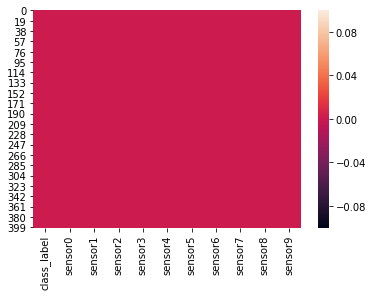

In [20]:
# lets confirm if we have any null value inside our data set

sns.heatmap(data = df.isnull())

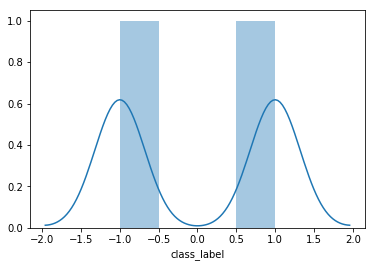

In [21]:
# Univeriate Plotting

sns.distplot(df['class_label']) 

# Equally distribute which was obvious from EDA we performed earlier!

In [22]:
# Lets grab few more plots, and see if we find some important information regarding our data set

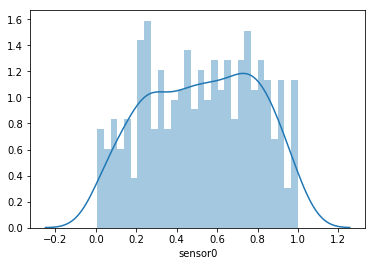

In [23]:
sns.distplot(df['sensor0'], kde = True, bins = 30)

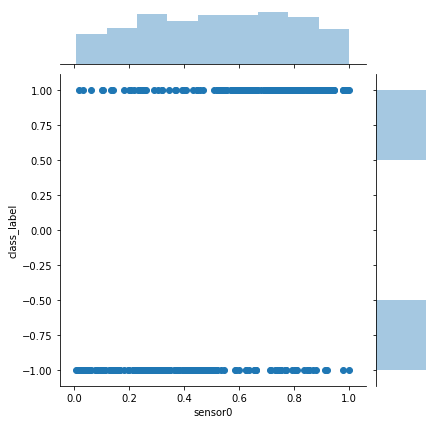

In [24]:
# Bivariate Plotting

sns.jointplot(x = 'sensor0', y = 'class_label', data = df)

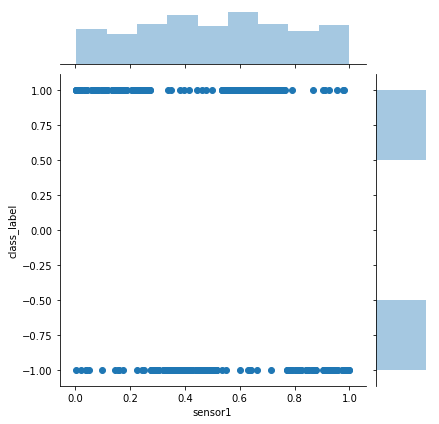

In [25]:
# Bivariate plotting

sns.jointplot(x = 'sensor1', y = 'class_label', data = df) # 

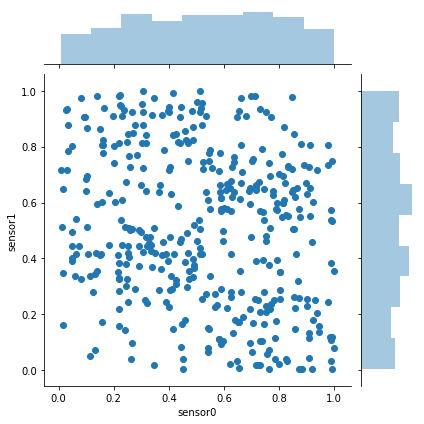

In [26]:
sns.jointplot(x = 'sensor0', y = 'sensor1', data = df)

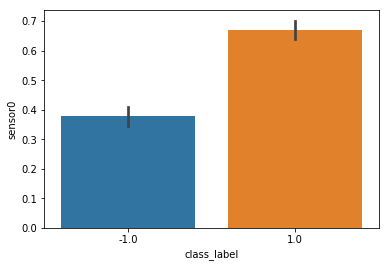

In [27]:
sns.barplot(x = 'class_label', y = 'sensor0', data = df)

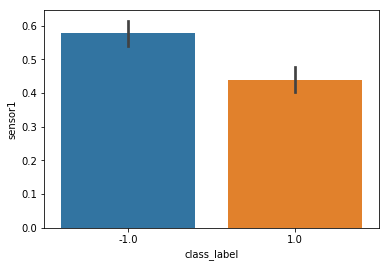

In [28]:
sns.barplot(x = 'class_label', y = 'sensor1', data = df)

### Data Normalization and Features Scaling:

In [29]:
scaler = StandardScaler() # creating scaler object of StandardScaler class

In [30]:
scaler.fit(df) # fit the data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
print(scaler.mean_) # mean of scaled feautures

[0.         0.52366059 0.50922306 0.48123849 0.50975199 0.49787532
 0.50106504 0.49048014 0.4823716  0.48282233 0.54193334]


In [32]:
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [33]:
scaled_features = scaler.transform(df) # applyed transformation

In [34]:
df_feat = pd.DataFrame(data = scaled_features, columns = df.columns[:]) # dataframe of scaled values

In [35]:
df_feat.head()

# Perfect! Now we have perfectly standardized and scaled dataframe

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,1.159533,0.784209,0.190322,-0.991648,1.305944,0.927822,-1.309333,0.266167,0.394942,0.454293
1,1.0,1.046817,-0.926072,1.353050,-0.590123,0.368943,-0.024436,1.184756,-1.020618,-1.581615,0.958976
2,1.0,0.637440,0.312997,0.348354,0.972798,0.920561,0.523290,-1.431585,-1.682906,0.597719,1.062195
3,1.0,0.970771,-1.701231,-0.683073,0.395351,1.051752,-0.051257,1.164548,-0.504903,0.840140,1.287622
4,1.0,0.989982,-1.210676,-0.461201,1.441087,0.674625,-0.429712,-1.059149,0.476105,0.034065,1.429494


### Features Engineerig with PCA:

In [36]:
pca = PCA(n_components = 2) # features extractions with 2 PC

In [37]:
pca.fit(scaled_features) # fitting the scaled features

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# Transforms the data to first two components
x_pca = pca.transform(scaled_features)

In [39]:
x_pca.shape # CheckPoint!

(400, 2)

In [40]:
type(x_pca)

numpy.ndarray

In [41]:
df_pca = pd.DataFrame(x_pca) # creating dataframe off of extracted scaled features

In [42]:
df_pca.head()

,0,1
0,-1.503023,-0.871964
1,-0.303019,0.980826
2,-1.718560,-1.492466
3,-2.114390,2.001712
4,-1.971729,0.456742


### My Own Assumption:

In [43]:
# Now that, we have performed EDA, Data visualization, Data Normalization, Features extraction!
# Data Scaling and Transformation, we are ready to predict classes off of this final dataframe!

# Remeber! First we are going to perdict the classes off of the Normalized data, without PCA and dimentionality reduction
# and try to observe how well our classifier has trained just by normalizing the data set!

# So let's give it a shot!

# for my assumptions what I think would be the best classifier for it is either KNN or Logistic Regression,
# and I'll explain it later why!

# Lets try KNN first

X0 = df.drop('class_label', axis = 1)
y0 = df['class_label']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.3, random_state = 101)

knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(X0_train,y0_train)

my_assump_predictions = knn_model.predict(X0_test)

print(confusion_matrix(y0_test, my_assump_predictions))
print('classification report:')
print(classification_report(y0_test, my_assump_predictions))
print('Accuracy: {0:.3f}'.format(accuracy_score(y0_test, my_assump_predictions) * 100))


[[53  2]
 [ 4 61]]
classification report:
              precision    recall  f1-score   support

        -1.0       0.93      0.96      0.95        55
         1.0       0.97      0.94      0.95        65

   micro avg       0.95      0.95      0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Accuracy: 95.000


### 1. Logistic Regression:

In [44]:
log_model = LogisticRegression()

In [46]:
X = df_feat
y = df['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [47]:
log_model.fit(X_train, y_train)

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
predictions = log_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, predictions) * 100))

# Have a look at the performace of our classifier, which has been trained on Normalized data set!
# It's come up with excellent resutls, which shows our data frame has already trained awesome!

[[55  0]
 [ 0 65]]


              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 100.000


### 2. Support Vector Machines:

In [50]:
svm = SVC()

In [51]:
X1 = df_feat
y1 = df['class_label']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

In [52]:
svm.fit(X1_train, y1_train)

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
predictions_1 = svm.predict(X1_test)

In [54]:
print(confusion_matrix(y1_test, predictions_1))
print('\n')
print(classification_report(y1_test, predictions_1))
print('Accuracy: {0:.3f}'.format(accuracy_score(y1_test, predictions_1) * 100))

[[55  0]
 [ 0 65]]


              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 100.000


In [55]:
# Of all classes we predicted

### 3. Classification with Dimetionality Reduction:

In [56]:
# Now lets try to train our model, with feature Engineered data set we made earlier.
# We reduced the dimentionality of our features, and extraced our the features that doesn't really impact our
# target class. Let's go ahead and grab that data set

In [57]:
df_pca.head() # there it is. The dataframe with the features that associate our target class the most!

,0,1
0,-1.503023,-0.871964
1,-0.303019,0.980826
2,-1.718560,-1.492466
3,-2.114390,2.001712
4,-1.971729,0.456742


In [58]:
x_pca.shape

(400, 2)

Text(0, 0.5, 'Second Principle Component')

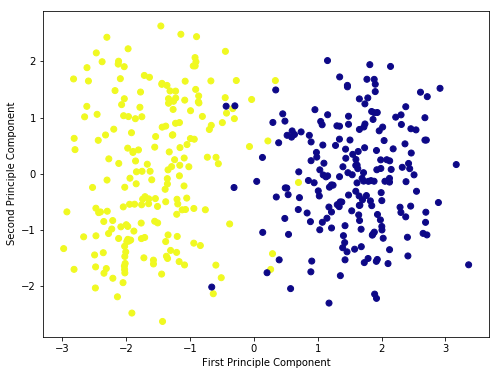

In [59]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df_feat['class_label'], cmap = 'plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

# clearly using the two components we can easily seperate these two classes
# the problem is we don't know what these two components are!
# I'll tell you what, It's gonna come up with insane results!
# Can't wait to see the confusion matrix, and classification report
# Let's do it!

In [60]:
X2 = df_pca
y2 = df['class_label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 101)

In [61]:
log_model.fit(X2,y2)

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
predictions_2 = log_model.predict(X2_test)

In [63]:
print(confusion_matrix(y2_test, predictions_2))
print('\n')
print(classification_report(y2_test, predictions_2))
print('Accuracy: {0:.3f} '.format(accuracy_score(y2_test, predictions_2) * 100))

# Have a look at the accuracy of our classifier! It's close to 96%
# Lets try to find out, if we can improve it a bit more!

[[53  2]
 [ 3 62]]


              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.95        55
         1.0       0.97      0.95      0.96        65

   micro avg       0.96      0.96      0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Accuracy: 95.833 


### 3. K-Nearest Neighbors:

In [64]:
X2 = df_feat
y2 = df['class_label']

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_features, y2, test_size = 0.3, random_state = 101)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)

In [67]:
knn.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
predictions_2 = knn.predict(X2_test)

In [69]:
# let's evaluate our knn model

In [70]:
print(confusion_matrix(y_test, predictions_2))
print('classification report:')
print(classification_report(y_test, predictions_2))
print('Accuracy: {0:.3f}'.format(accuracy_score(y2_test, predictions_2) * 100))

# Woowww!! Accuracy, up to perfection!

[[55  0]
 [ 0 65]]
classification report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 100.000


In [71]:
import pickle

In [74]:
with open('LogRegression', 'wb') as f:
    pickle.dump(log_model, f)

In [79]:
with open('ranked_correlations.csv', 'w') as file:
    thewriter = csv.writer(file)
    
    thewriter.writerow(ranked_correlations)

In [83]:
ranked_correlations

[1.0,
 0.6606179222510381,
 0.6076228345496761,
 0.5432950594605451,
 0.43363644436420123,
 0.22414719421524462,
 0.1756121918018469,
 0.09490706714608717,
 0.03877543484999283,
 -0.0074144251226751475,
 -0.25200734226009575]